<a href="https://colab.research.google.com/github/AlfaIV/RFinfSystem/blob/hm1/%D0%94%D0%971_%D0%A0%D0%A1%D0%9F%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 1
вариант: 17


выполнил:


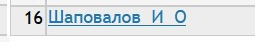

image.png

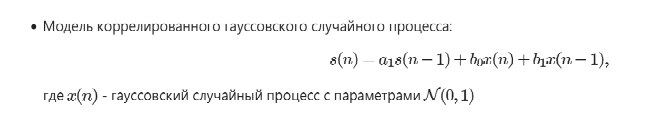

In [1]:
from math import sqrt, pi, exp, log, copysign
from numpy import linspace, vectorize, random
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sg
import copy

In [2]:
b = 8
A = 87.56
1/A

0.011420740063956145

# Формирование входного сигнала
Формируем гауссовский СП

In [3]:
mean = 0
std = 1
size = int(1e4)
gauss_sig = np.random.normal(mean, std, size)


Получим следующую форму сигнала

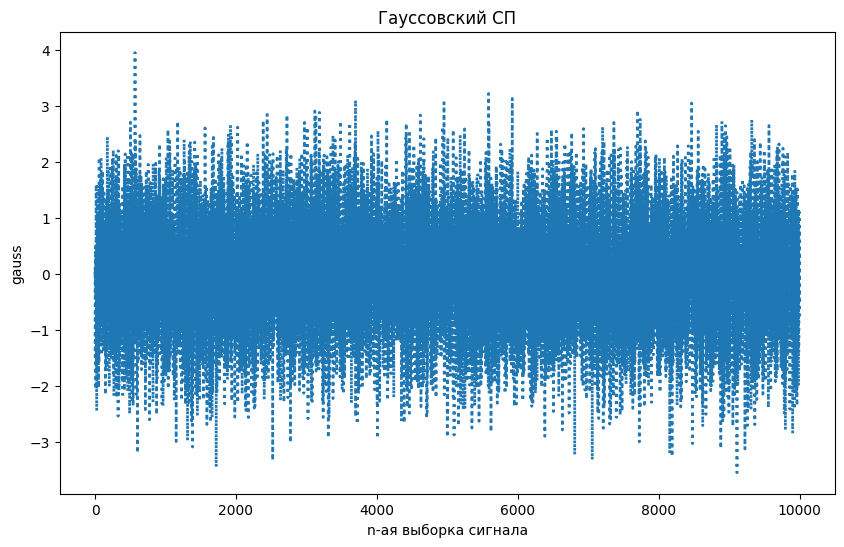

In [4]:
fig, ax = plt.subplots()

plt.plot(gauss_sig,
        linewidth=2.0,
        linestyle=':',)
fig.set_size_inches(10, 6)

plt.title("Гауссовский СП")
plt.xlabel("n-ая выборка сигнала")
plt.ylabel("gauss")

plt.show()

Теперь на основе полученных выборок сигнала сформируем сигнал требуемого вида

In [5]:
def s(n, gauss_sig):
  a_1, b_0, b_1 = 1, 1, 1 #параметры принимаем такими так как не заданно другое значение
  try:
    previous_val = b_0*gauss_sig[0] #храним предыдущее значение, избавляемся от рекурсии
    returned_sig = [] #возвращаемый массив данных
    for n_i in range(n)[1:]:
      returned_sig.append(previous_val)
      previous_val = a_1*previous_val + b_0*gauss_sig[n_i] + b_1*gauss_sig[n_i - 1]

    returned_sig.append(previous_val)
    return returned_sig
  except IndexError:
    print("Некорректный массив гауссовых значений")

In [6]:
n = np.arange(size)
sig = s(size, gauss_sig)
len(n), len(sig)

(10000, 10000)

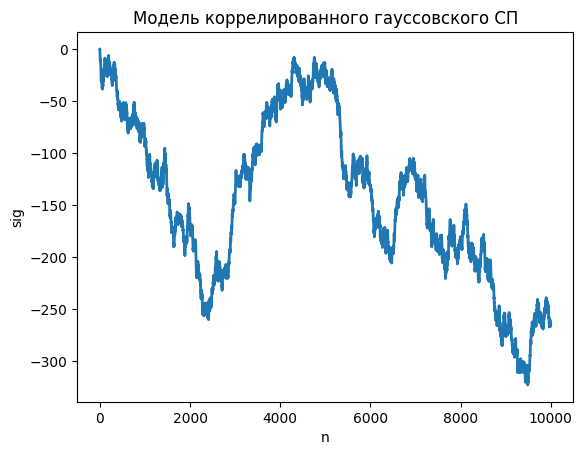

In [7]:
# plot
fig, ax = plt.subplots()

ax.plot(n, sig, linewidth=2.0)

plt.title("Модель коррелированного гауссовского СП")
plt.xlabel("n")
plt.ylabel("sig")

plt.show()

Изучим стат хараетиристики полученного сигнала

In [8]:
# mean_value = np.mean(sig)
# median_value = np.median(sig)
# variance_value = np.var(sig)
# std_deviation = np.std(sig)
# min_value = np.min(sig)
# max_value = np.max(sig)

print("Среднее значение:", np.mean(sig))
print("Медиана:", np.median(sig))
print("Дисперсия:", np.var(sig))
print("Стандартное отклонение:", np.std(sig))
print("Минимальное значение:", np.min(sig))
print("Максимальное значение:", np.max(sig))

Среднее значение: -143.87985365590495
Медиана: -138.29006600687995
Дисперсия: 6333.113361415773
Стандартное отклонение: 79.58086052196076
Минимальное значение: -322.8759279542629
Максимальное значение: 0.1081192600245429


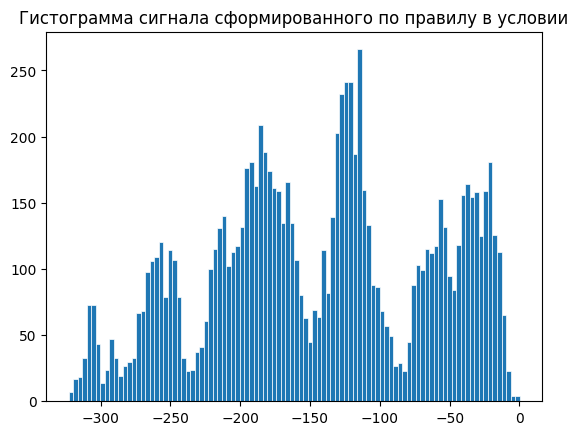

In [9]:
fig, ax = plt.subplots()

ax.hist(sig, bins=int(size/100), linewidth=0.5, edgecolor="white")

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.title("Гистограмма сигнала сформированного по правилу в условии")
plt.show()

Нормируем полученный сигнал

In [10]:
sig_norm = copy.copy(sig)
sig_norm = (sig_norm - np.mean(sig_norm))/np.std(sig_norm)

Теперь мы имеем действительно нормированный сигнал

In [11]:
print("Среднее значение:", np.mean(sig_norm))
print("Медиана:", np.median(sig_norm))
print("Дисперсия:", np.var(sig_norm))
print("Стандартное отклонение:", np.std(sig_norm))
print("Минимальное значение:", np.min(sig_norm))
print("Максимальное значение:", np.max(sig_norm))
print("===================")
print("Медиана:", np.median(sig))

Среднее значение: -2.7284841053187845e-16
Медиана: 0.07024035191831686
Дисперсия: 1.0000000000000004
Стандартное отклонение: 1.0000000000000002
Минимальное значение: -2.2492352196790213
Максимальное значение: 1.809329177537547
Медиана: -138.29006600687995


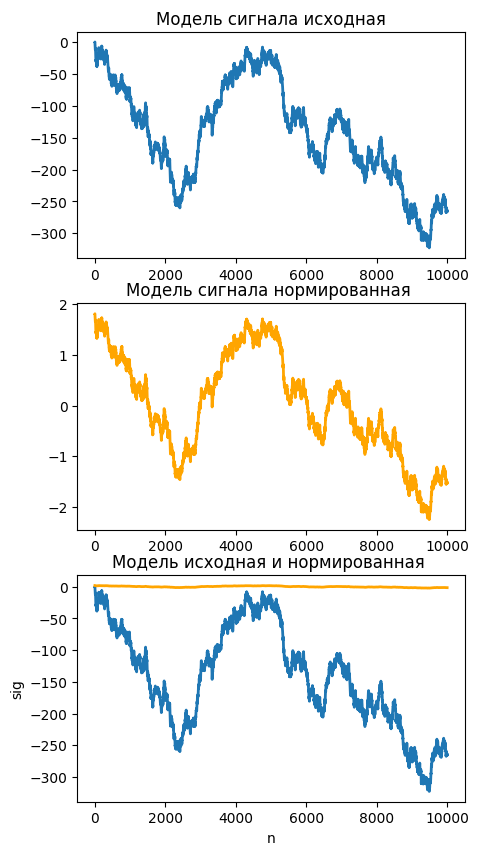

In [12]:
# %%capture
# plot
fig, (ax1, ax2, ax3) = plt.subplots(3,1)


ax1.plot(n, sig, linewidth=2.0)
ax1.set_title('Модель сигнала исходная')

ax2.plot(n, sig_norm, linewidth=2.0, color="orange")
ax2.set_title('Модель сигнала нормированная ')

ax3.plot(n, sig, linewidth=2.0)
ax3.plot(n, sig_norm, linewidth=2.0, color="orange")
ax3.set_title('Модель исходная и нормированная ')

plt.xlabel("n")
plt.ylabel("sig")

fig.set_size_inches(5, 10)
plt.show()

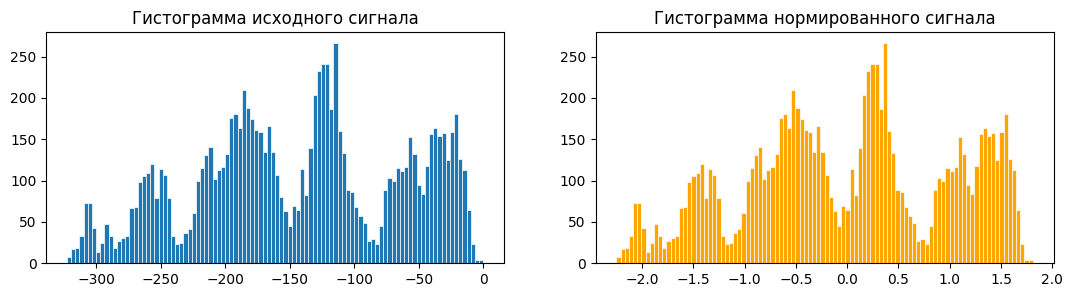

In [59]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(sig, bins=int(size/100), linewidth=0.5, edgecolor="white")
ax1.set_title('Гистограмма исходного сигнала')

ax2.hist(sig_norm, bins=int(size/100), linewidth=0.5, edgecolor="white", color="orange")
ax2.set_title('Гистограмма нормированного сигнала')

fig.set_size_inches(13, 3)
plt.show()

# Компрессирование
Теперь проведем **компрессирование** сигнала

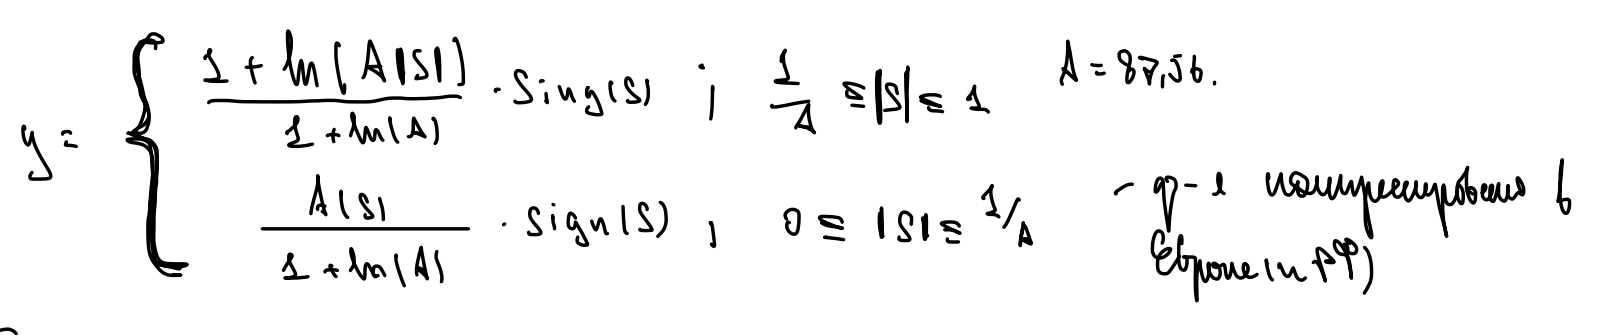

In [33]:
def compessor(x):
  if 1/A <= abs(x) or abs(x) <= 1:
    return (1 + log(A*abs(x)))/(1 + log(A))*copysign(1,x)
  elif abs(x) < 1/A:
    return (A*abs(x))/(1 + log(A))*copysign(1,x)

In [49]:
compress_sig = vectorize(compessor)(sig_norm)

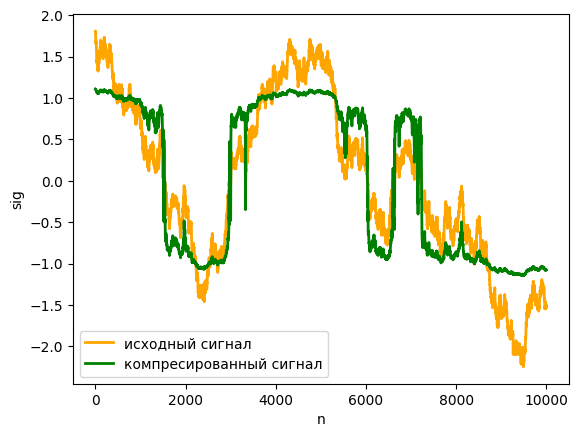

In [35]:
# plot
fig, ax = plt.subplots()

ax.plot(n, sig_norm,
        linewidth=2.0,
        label='исходный сигнал',
        color="orange")
ax.plot(n, compress_sig,
        linewidth=2.0,
        label='компресированный сигнал',
        color="green")

plt.xlabel("n")
plt.ylabel("sig")

plt.legend()
plt.show()

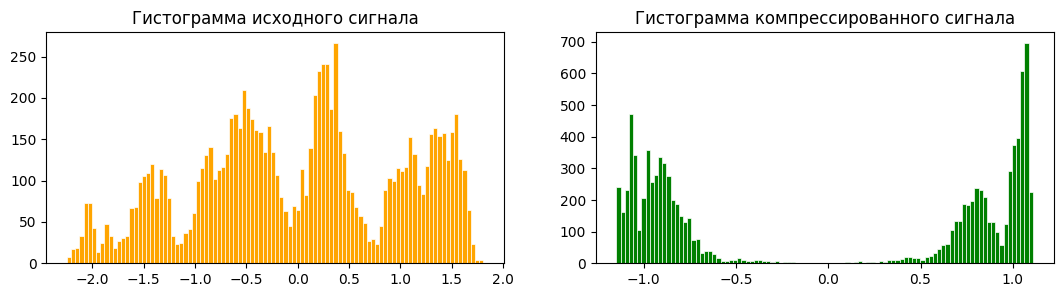

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(sig_norm, bins=int(size/100),
         linewidth=0.5,
         edgecolor="white",
         color="orange")
ax1.set_title('Гистограмма исходного сигнала')

ax2.hist(compress_sig, bins=int(size/100),
         linewidth=0.5,
         edgecolor="white",
         color="green")
ax2.set_title('Гистограмма компрессированного сигнала')

fig.set_size_inches(13, 3)
plt.show()

# Квантование сигнала
Теперь проведем квантование полученного комперсиированного сигнала

In [37]:
def quantizer(signal, N):
  quantized_signal = []
  step = (max(signal) - min(signal))/N
  levels = np.array([step*i for i in range(N + 1)]) + min(signal)
  #!!!!!!!!!!!
  for countdown in signal:
    distance = np.abs(levels - countdown)
    curent_level = levels[np.argmin(distance)]
    quantized_signal.append(curent_level)
  return quantized_signal, levels


In [38]:
quanted_sig, levels = quantizer(compress_sig, b)
# print(quanted_sig)

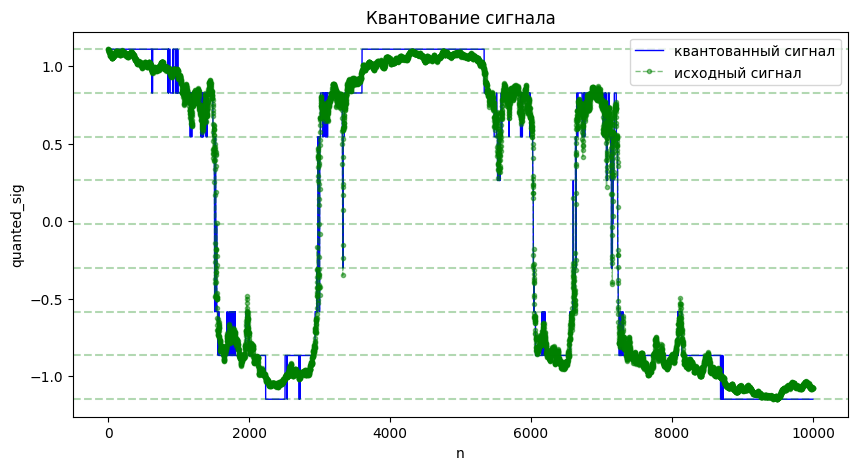

In [39]:
# plot
fig, ax = plt.subplots()

ax.plot(n, quanted_sig,
        linewidth=1.0,
        label="квантованный сигнал",
        color = "blue")

plt.title("Квантование сигнала")
plt.xlabel("n")
plt.ylabel("quanted_sig")

ax.plot(n, compress_sig,
        linewidth=1.0,
        linestyle='--',
        marker='.',
        label="исходный сигнал",
        alpha=0.5,
        color="green")

for i_level in levels:
  plt.axhline(y=i_level,
              color='green',
              linestyle='--',
              alpha = 0.3)


# ax1.plot(n, quanted_sig,
#         linewidth=1.0,
#         label="квантованный сигнал")


fig.set_size_inches(10, 5)
plt.legend()
plt.show()

# Экспандирование сигнала
Теперь проведем операции обратные проведеннным ранее

In [50]:
def expander(y):
  if abs(y) < 1/(1 + log (A)):
    return (abs(y)*(1 + log(A)))/A*copysign(1,y)
  elif 1/(1+log(A)) <= abs(y) or abs(y) <= 1:
    return exp(-1 + abs(y)*(1 + log(A)))/A*copysign(1,y)

In [51]:
expand_sig = vectorize(expander)(compress_sig)

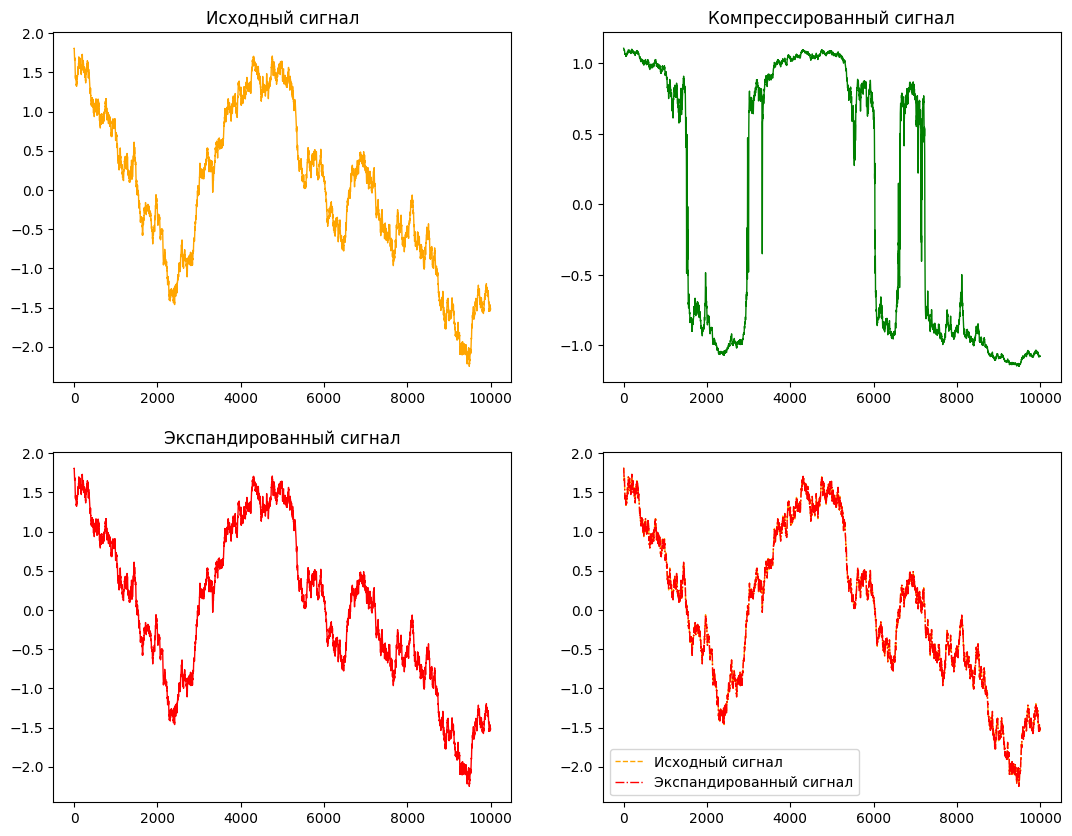

In [57]:

fig, axs = plt.subplots(2,2)

axs[0,0].plot(sig_norm,
         linewidth=1,
         color="orange")
axs[0,0].set_title('Исходный сигнал')

axs[0,1].plot(compress_sig,
         linewidth=1,
         color="green")
axs[0,1].set_title('Компрессированный сигнал')


axs[1,0].plot(expand_sig,
         linewidth=1,
         color="red")
axs[1,0].set_title('Экспандированный сигнал')


axs[1,1].plot(sig_norm,
         linewidth=1,
         color="orange",
        #  alpha=0.5,
         linestyle='--',
         label='Исходный сигнал')

axs[1,1].plot(expand_sig,
         linewidth=1,
         color="red",
        #  alpha=1.0,
         linestyle='-.',
         label='Экспандированный сигнал')
axs[1,1].legend()


fig.set_size_inches(13, 10)
plt.show()